In [1]:
import matplotlib.pyplot as plt
import json
import os

In [2]:
results_path = r'C:\Users\Alfon\OneDrive - Delft University of Technology\Honours\02 Python\Honours Project\AetheriaPackage\output\_beta_sensitivity'


In [9]:
def search_json(dir, search_term, save_lst=list([])):
    for f in os.listdir(dir):
        if os.path.isdir(os.path.join(dir, f)):
            search_json(os.path.join(dir, f), search_term, save_lst)
        elif os.path.splitext(f)[-1] == '.json' and search_term in f:
            save_lst.append(os.path.join(dir, f))
    
    return save_lst

In [10]:
data_files = search_json(results_path, 'design')

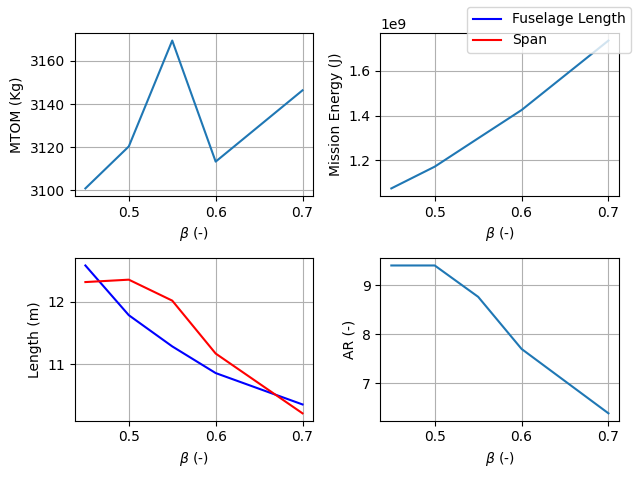

In [11]:
beta = []
MTOM = []
lfus = []
AR = []
span = []
mission_energy = []
mission_time = []


for file_path in data_files:
    with open(file_path, 'r') as f:
        data = json.load(f)

    beta.append(data['Fuselage']['beta_crash'])
    AR.append(data['Wing']['aspect_ratio'])
    span.append(data['Wing']['span'])
    lfus.append(data['Fuselage']['length_fuselage'])
    MTOM.append(data['AircraftParameters']['MTOM'])
    mission_energy.append(data['AircraftParameters']['mission_energy'])
    mission_time.append(data['AircraftParameters']['mission_time'])

fig, axs = plt.subplots(2, 2)

ax = axs[0, 0]
ax.plot(beta, MTOM)
ax.set_xlabel(r'$\beta$ (-)')
ax.set_ylabel(r'MTOM (Kg)')
ax.grid()
ax = axs[0, 1]
ax.plot(beta, mission_energy)
ax.set_xlabel(r'$\beta$ (-)')
ax.set_ylabel(r'Mission Energy (J)')
ax.grid()

ax = axs[1, 0]
ax.plot(beta, lfus, label='Fuselage Length', color='blue')
ax.plot(beta, span, label='Span', color='red')
ax.set_xlabel(r'$\beta$ (-)')
ax.set_ylabel(r'Length (m)')
ax.grid()

ax = axs[1, 1]
ax.plot(beta, AR)
ax.set_xlabel(r'$\beta$ (-)')
ax.set_ylabel(r'AR (-)')
ax.grid()

fig.legend()
fig.tight_layout()


In [3]:
line = r''

value_lst = [float(value) for value in line.split()]

In [4]:
value_lst

[]